In [70]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from LeukemiaNet import *

classifier = LeukemiaClassifier()
feature_extractor = LeukemiaNet_Features_Resnet()
classifier.load_state_dict(torch.load("Classifier_tuned.pt"))
feature_extractor.load_state_dict(torch.load("FeatureExtractor_tuned.pt"))
classifier.eval()
feature_extractor.eval()

print("Successfully loaded models")

Successfully loaded models


In [71]:
def report(pred_prob):
    pred_prob = pred_prob.numpy()
    classification = ["Benign", "Early", "Pre", "Pro"] [np.argmax(pred_prob)]
    cancer_prob = 1-pred_prob[0]
    print("Probability of cancer: %.4f"%(cancer_prob))
    if cancer_prob > 0.5:
        print("Prediced cancerous with cancer class: %s"%(classification))
        print("Probability of early leukemia conditioned on cancer: %.4f" %(pred_prob[1]/cancer_prob))
        print("Probability of pre leukemia conditioned on cancer: %.4f"%(pred_prob[2]/cancer_prob))
        print("Probability of pro leukemia conditioned on cancer: %.4f"%(pred_prob[3]/cancer_prob))
    else:
        print("Prediced benign")
        print("Probability of early leukemia: %.4f" %(pred_prob[1]))
        print("Probability of pre leukemia: %.4f"%(pred_prob[2]))
        print("Probability of pro leukemia: %.4f"%(pred_prob[3]))

In [72]:
## Load in demo data from testing set ##

## Original Data
orig = datasets.ImageFolder('./Testing_Demo_Original/', transform=transforms.ToTensor())

## Processed Data
proc = datasets.ImageFolder('./Testing_Demo_Processed/', transform=transforms.ToTensor())

## Extract Images
benign_orig = orig[0][0].unsqueeze(0)
benign_proc = proc[0][0].unsqueeze(0)
early_orig = orig[1][0].unsqueeze(0)
early_proc = proc[1][0].unsqueeze(0)
pre_orig = orig[2][0].unsqueeze(0)
pre_proc = proc[2][0].unsqueeze(0)
pro_orig = orig[3][0].unsqueeze(0)
pro_proc = proc[3][0].unsqueeze(0)


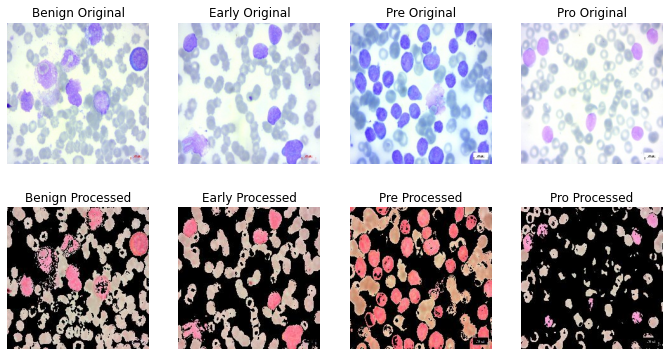

In [73]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))

# plot original images on top row
ax[0, 0].imshow(benign_orig.squeeze().permute(1, 2, 0))
ax[0, 0].set_title('Benign Original')
ax[0,0].axis('off')
ax[0, 1].imshow(early_orig.squeeze().permute(1, 2, 0))
ax[0, 1].set_title('Early Original')
ax[0, 1].axis('off')
ax[0, 2].imshow(pre_orig.squeeze().permute(1, 2, 0))
ax[0, 2].set_title('Pre Original')
ax[0, 2].axis('off')
ax[0, 3].imshow(pro_orig.squeeze().permute(1, 2, 0))
ax[0, 3].set_title('Pro Original')
ax[0, 3].axis('off')

# plot processed images on bottom row
ax[1, 0].imshow(benign_proc.squeeze().permute(1, 2, 0))
ax[1, 0].set_title('Benign Processed')
ax[1,0].axis('off')
ax[1, 1].imshow(early_proc.squeeze().permute(1, 2, 0))
ax[1, 1].set_title('Early Processed')
ax[1, 1].axis('off')
ax[1, 2].imshow(pre_proc.squeeze().permute(1, 2, 0))
ax[1, 2].set_title('Pre Processed')
ax[1, 2].axis('off')
ax[1, 3].imshow(pro_proc.squeeze().permute(1, 2, 0))
ax[1, 3].set_title('Pro Processed')
ax[1, 3].axis('off')

# adjust spacing between subplots and display the figure
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()



In [74]:
with torch.no_grad():
    benign_features = feature_extractor(benign_proc)
    early_features = feature_extractor(early_proc)
    pre_features = feature_extractor(pre_proc)
    pro_features = feature_extractor(pro_proc)

    benign_pred = nn.Softmax(dim=1)(classifier(benign_features)).squeeze()
    early_pred = nn.Softmax(dim=1)(classifier(early_features)).squeeze()
    pre_pred = nn.Softmax(dim=1)(classifier(pre_features)).squeeze()
    pro_pred = nn.Softmax(dim=1)(classifier(pro_features)).squeeze()

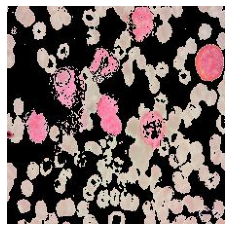

Model Output: [9.9217564e-01 2.8899810e-03 4.0723130e-04 4.5271106e-03]
Probability of cancer: 0.0078
Prediced benign
Probability of early leukemia: 0.0029
Probability of pre leukemia: 0.0004
Probability of pro leukemia: 0.0045


In [75]:
plt.imshow(benign_proc.squeeze().permute(1, 2, 0))
plt.axis('off')
plt.show()
print("Model Output:", benign_pred.numpy())
report(benign_pred)

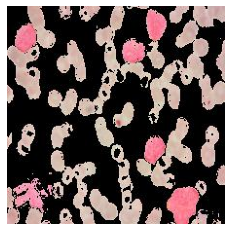

Model Output: [0.00373686 0.9570765  0.02423867 0.01494789]
Probability of cancer: 0.9963
Prediced cancerous with cancer class: Early
Probability of early leukemia conditioned on cancer: 0.9607
Probability of pre leukemia conditioned on cancer: 0.0243
Probability of pro leukemia conditioned on cancer: 0.0150


In [76]:
plt.imshow(early_proc.squeeze().permute(1, 2, 0))
plt.axis('off')
plt.show()
print("Model Output:", early_pred.numpy())
report(early_pred)

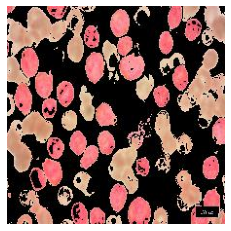

Model Output: [8.2825727e-06 4.2826748e-03 9.9539953e-01 3.0950009e-04]
Probability of cancer: 1.0000
Prediced cancerous with cancer class: Pre
Probability of early leukemia conditioned on cancer: 0.0043
Probability of pre leukemia conditioned on cancer: 0.9954
Probability of pro leukemia conditioned on cancer: 0.0003


In [77]:
plt.imshow(pre_proc.squeeze().permute(1, 2, 0))
plt.axis('off')
plt.show()
print("Model Output:", pre_pred.numpy())
report(pre_pred)

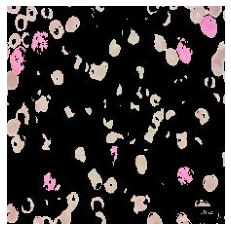

Model Output: [9.2594512e-03 1.0526350e-02 1.7544643e-04 9.8003870e-01]
Probability of cancer: 0.9907
Prediced cancerous with cancer class: Pro
Probability of early leukemia conditioned on cancer: 0.0106
Probability of pre leukemia conditioned on cancer: 0.0002
Probability of pro leukemia conditioned on cancer: 0.9892


In [78]:
plt.imshow(pro_proc.squeeze().permute(1, 2, 0))
plt.axis('off')
plt.show()
print("Model Output:", pro_pred.numpy())
report(pro_pred)